In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
old = pd.read_table('isochrones/cmd_synt.13000.Fe-1.0.dat', skiprows = 4, header = None, sep = '\s+', usecols=[0,1])
old.head()

,0,1
0,4.71136,0.56505
1,3.94420,0.51366
2,1.41247,-0.05395
3,5.07772,0.61336
4,5.07172,0.60758


In [3]:
young = pd.read_table('isochrones/cmd_synt.3000.Fe-2.3.dat', skiprows = 4, header = None, sep = '\s+', usecols=[0,1])
young.head()

,0,1
0,4.33105,0.44937
1,3.31389,0.26715
2,2.16792,-0.12057
3,4.89255,0.53584
4,4.90654,0.53528


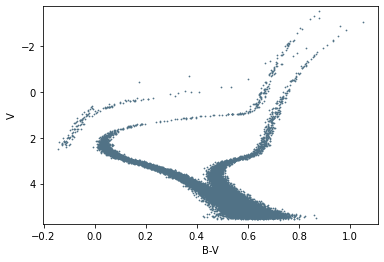

In [4]:
def plotCMD(cmd):
    color = cmd.iloc[:,1]
    magnitude = cmd.iloc[:,0]
    plt.scatter(color, magnitude, s = 0.5535, color = "#517286")
    plt.ylim([magnitude.max()+0.2, magnitude.min()-0.2])
    plt.xlabel("B-V")
    plt.ylabel("V")
    
plotCMD(old)
plotCMD(young)
plt.show()

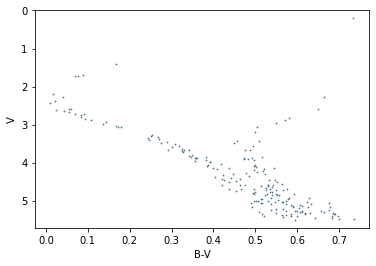

In [6]:
def mix_CMDs(files, n_to_sample):
    cmd = None
    for f, n in zip(files, n_to_sample):
        if cmd is not None:
            newcmd = pd.read_table(f, skiprows = 4, header = None, sep = '\s+', usecols=[0,1])
            newcmd = newcmd.iloc[np.random.choice(range(newcmd.shape[0]), n),:]
            cmd = pd.concat([cmd, newcmd])
        if cmd is None:
            newcmd = pd.read_table(f, skiprows = 4, header = None, sep = '\s+', usecols=[0,1])
            cmd = newcmd.iloc[np.random.choice(range(newcmd.shape[0]), n),:]
    return cmd

somemix = mix_CMDs(['isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-2.3.dat'], [80, 120])
plotCMD(somemix)

0.45321023658323695
0.3381114993267595


/opt/anaconda3/envs/pavia00/lib/python3.9/site-packages/mistree/mst/branches.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  branch_index.append(np.ndarray.tolist(np.ndarray.flatten(np.array(_twig))))
/opt/anaconda3/envs/pavia00/lib/python3.9/site-packages/mistree/mst/branches.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  branch_index = [np.ndarray.tolist(np.hstack(np.array(branch_index[i]))) for i in range(0, len(branch_index))]
/opt/anaconda3/envs/pavia00/lib/python3.9/site-packages/mistree/mst/branches.py:86: VisibleDeprecationWarning

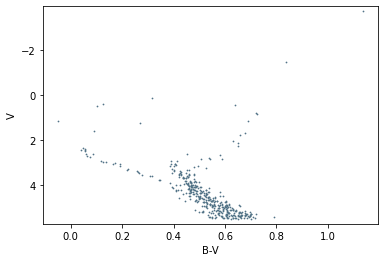

In [7]:
import mistree as mist #use pavia00
someothermix = mix_CMDs(['isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.11000.Fe-1.0.dat', 'isochrones/cmd_synt.7000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-2.3.dat'], [80,120,110,90])
mst = mist.GetMST(x=somemix.iloc[:,0].to_numpy(), y=somemix.iloc[:,1].to_numpy())
d, l, b, s = mst.get_stats()
print(np.median(l)/np.quantile(l,0.9)) #ratio of median edge length to 90th percentile edge length
mst = mist.GetMST(x=someothermix.iloc[:,0].to_numpy(), y=someothermix.iloc[:,1].to_numpy())
d, l, b, s = mst.get_stats()
plotCMD(someothermix)
print(np.median(l)/np.quantile(l,0.9))

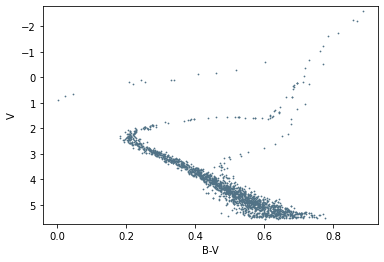

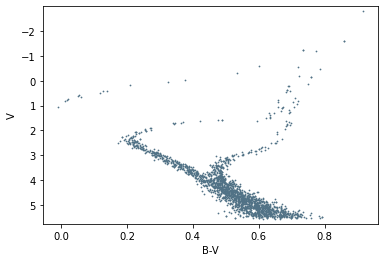

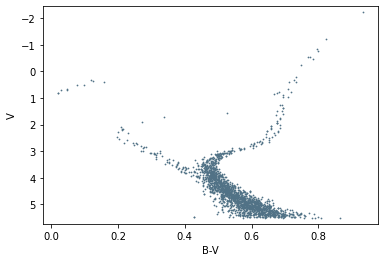

In [18]:
def mix_CMDs_proportional(CMD0, CMD1, alpha):
    mixed_CMD = mix_CMDs([CMD0, CMD1], [int(np.round(2000*alpha)), int(np.round((1-alpha)*2000))])
    return mixed_CMD

plotCMD(mix_CMDs_proportional('isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-1.0.dat', 0.1))
plt.show()
plotCMD(mix_CMDs_proportional('isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-1.0.dat', 0.5))
plt.show()
plotCMD(mix_CMDs_proportional('isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-1.0.dat', 0.9))
plt.show()


/opt/anaconda3/envs/pavia00/lib/python3.9/site-packages/mistree/mst/branches.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  branch_index.append(np.ndarray.tolist(np.ndarray.flatten(np.array(_twig))))
/opt/anaconda3/envs/pavia00/lib/python3.9/site-packages/mistree/mst/branches.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  branch_index = [np.ndarray.tolist(np.hstack(np.array(branch_index[i]))) for i in range(0, len(branch_index))]
/opt/anaconda3/envs/pavia00/lib/python3.9/site-packages/mistree/mst/branches.py:86: VisibleDeprecationWarning

[[0.00318264 0.00447329 0.00587792 0.0071339  0.00851946 0.00967089
  0.0112484  0.01348372 0.01778564]
 [0.00329816 0.00492488 0.00615475 0.00732564 0.0087207  0.0100826
  0.01170199 0.01389979 0.01825246]
 [0.00322346 0.00471413 0.00627326 0.00753893 0.0086968  0.01008568
  0.01158143 0.01394081 0.01849554]
 [0.00343212 0.00479176 0.00601513 0.00740168 0.00863994 0.0099097
  0.01149399 0.01373608 0.01823089]
 [0.00333022 0.00480376 0.0061386  0.00737055 0.00887129 0.0103512
  0.01223138 0.01458768 0.01932852]
 [0.00340562 0.00487691 0.00619159 0.00749448 0.00889892 0.01026777
  0.01196959 0.01487896 0.0203113 ]
 [0.00321572 0.00475882 0.00613384 0.00740645 0.00870334 0.01003669
  0.01179108 0.01366031 0.01963408]
 [0.00337314 0.00485991 0.0061404  0.0073693  0.00867586 0.01018461
  0.01170476 0.01417306 0.01962484]
 [0.00312066 0.00455257 0.00585337 0.00717872 0.0083922  0.00957748
  0.01097062 0.01336494 0.01896336]
 [0.00302116 0.00432688 0.0056251  0.0067364  0.00783935 0.00920056

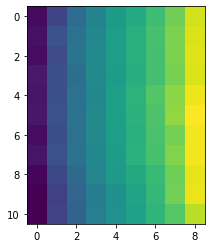

In [33]:
def MST_of_a_mix(CMD0, CMD1, alpha):
    thismix = mix_CMDs_proportional(CMD0, CMD1, alpha)
    mst = mist.GetMST(x=thismix.iloc[:,0].to_numpy(), y=thismix.iloc[:,1].to_numpy())
    d, l, b, s = mst.get_stats()
    lq = np.quantile(l, (1+np.arange(9))/10)
    return(lq)

MSTs = []
for alpha in np.arange(11)/10:
    MSTs.append(MST_of_a_mix('isochrones/cmd_synt.13000.Fe-2.3.dat', 'isochrones/cmd_synt.3000.Fe-1.0.dat', alpha))

    
print(np.array(MSTs))

plt.imshow(np.log(np.array(MSTs)))
plt.show()